#1.1data cleaning

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
# set seed for reproducibility
np.random.seed(0)
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv("C:/Users/Somay/Documents/Building_permits.csv")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445480e+11


#How many missing data points do we have?

In [4]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [5]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

26.26002315058403


In [6]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [7]:
# remove all the rows that contain a missing value
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [8]:
 #remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140,Ellis,expired,12/21/2017,5/6/2015,1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440,Geary,issued,8/3/2017,4/19/2016,1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647,Pacific,withdrawn,9/26/2017,5/27/2016,1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230,Pacific,complete,7/24/2017,11/7/2016,1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950,Market,issued,12/1/2017,11/28/2016,1.445480e+11


In [9]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


In [10]:
# get a small subset of the NFL dataset
subset_nfl_data = df.loc[:, 'Permit Number':'Street Number'].head()
subset_nfl_data


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950


In [11]:
#replace all NA's with 0
subset_nfl_data.fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950


In [12]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950


In [13]:
#1.2scalining and normalization

Text(0.5, 1.0, 'Scaled data')

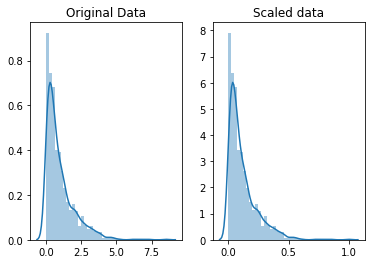

In [14]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Normalized data')

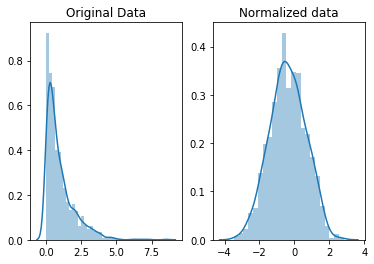

In [15]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [16]:
#1.3 parsing date

In [17]:
landslides = pd.read_csv("C:/Users/Somay/Documents/database.csv")

In [18]:
landslides.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [19]:
# print the first few rows of the date column
print(landslides['Date'].head())

0    1/2/1965
1    1/4/1965
2    1/5/1965
3    1/8/1965
4    1/9/1965
Name: Date, dtype: object


In [20]:
# check the data type of our date column
landslides['Date'].dtype

dtype('O')

In [21]:
import chardet

In [22]:
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)


str

In [23]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [24]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [25]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [26]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)